# Лабораторная работа №2

ФИО: Беледа Владислав Валентинович  
Группа: БИВТ-21-4

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap. 

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 1. Пример импорта данных

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

db = pd.read_csv('https://github.com/ta-k1/Beleda_Vladislav_BIVT-24-1/raw/main/winequality-red.csv')

## 2. Описание постановки задачи

**fixed acidity** - общее содержание кислот в вине, влияющее на вкус и стабильность;    
**volatile acidity** - количество уксусной кислоты, которая может придать неприятный уксусный привкус;  
**citric acid** - придает вину свежесть, аромат и может использоваться в качестве консерванта;  
**residual sugar** - количество сахара, оставшегося после ферментации, влияет на сладость вина;     
**chlorides** - содержание соли, которое может придать вину солоноватый вкус;   
**free sulfur dioxide** - антиоксидант и консервант, предотвращает рост микроорганизмов;    
**total sulfur dioxide** - сумма свободного и связанного диоксида серы, важен для стабильности вина;    
**density** - масса вина на единицу объема, индикатор содержания сахара или алкоголя;   
**pH** - определяет кислотность или щелочность вина, влияет на вкус, цвет и стабильность;   
**sulphates** - соединения серы, антиоксиданты и противомикробные агенты, влияют на вкус и аромат вина; 
**alcohol** - содержание алкоголя, влияет на крепость, сладость и баланс вина;  
**quality** - оценка качества вина от 0 до 10 баллов, целевая переменная для предсказания на основе входных признаков.  

## 3. Распределение целевой переменной

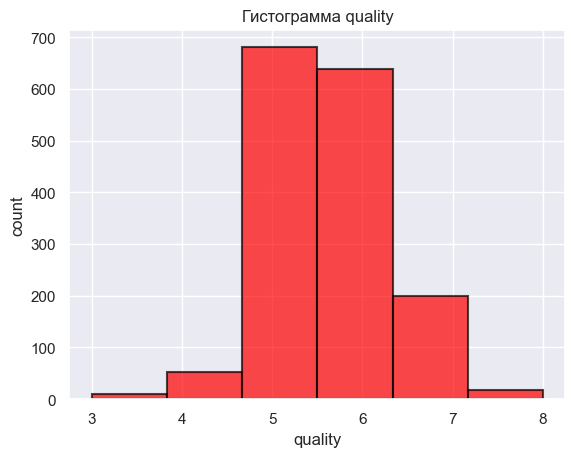

In [86]:
plt.hist(db['quality'], bins=6, color='red', edgecolor='black', linewidth=1.5, alpha=0.7)  
plt.xlabel('quality')
plt.ylabel('count')
plt.title('Гистограмма quality')
plt.show()

Исходя из гистограммы, можно сделать вывод, что большинство оценок качества разных сортов вин лежит в диапазоне от 5 до 6. Это говорит о том, что данные сорта вин получили средние оценки по качеству. Оценки 3, 4, 7 и 8 встречаются гораздо реже, что может указывать на то, что вина с такими оценками либо имеют низкое качество (3 и 4), либо высокое качество (7 и 8), что делает их менее распространенными.

Также можно отметить, что гистограмма имеет форму горба от оценок 3 до 8, что может говорить о том, что большинство сортов вин имеют средние оценки по качеству, а крайние оценки встречаются реже.

In [87]:
print(f'Количество уникальных значений целевой функции: {db["quality"].nunique()}')
print(f'Количество дубликатов значений целевой функции: {db["quality"].duplicated().sum()}')

Количество уникальных значений целевой функции: 6
Количество дубликатов значений целевой функции: 1593


## 4. Основные статистики по переменным

In [88]:
db.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 5. Основная информация

In [89]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## 6. Количество пропусков

In [90]:
db.isna().sum() #по каждому столбцу
db.isna().sum().sum() #общее

0

## 7. Гистограммы

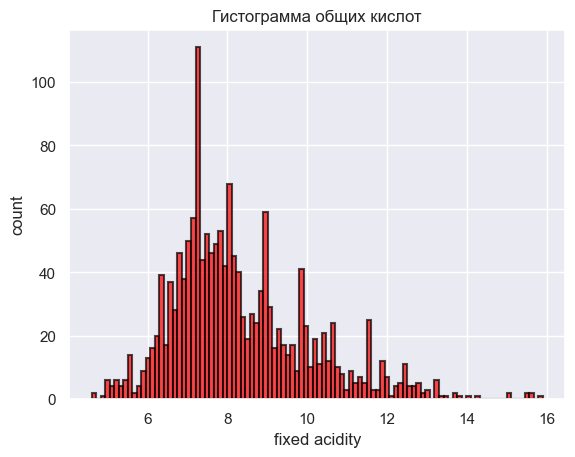

In [91]:
plt.hist(db['fixed acidity'], bins=100, color='red', edgecolor='black', linewidth=1.5, alpha=0.7)  
plt.xlabel('fixed acidity')
plt.ylabel('count')
plt.title('Гистограмма общих кислот')
plt.show()

Данная гистограмма общего содержания кислот в вине не является симметричной. Основной пик приходится на значения кислотности в районе 7, после чего наблюдается уменьшение в диапазоне от 7.5 до 9.5 и дальнейшее повышение к 11.5, с последующим убыванием. Закономерность состоит в плавном росте кислотности в диапазоне от 1 до 6 и небольших колебаниях в остальных значениях.

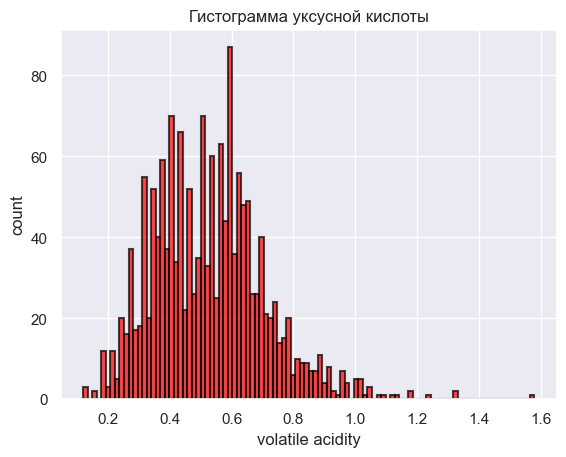

In [92]:
plt.hist(db['volatile acidity'], bins=100, color='red', edgecolor='black', linewidth=1.5, alpha=0.7)
plt.xlabel('volatile acidity')
plt.ylabel('count')
plt.title('Гистограмма уксусной кислоты')
plt.show()

Гистограмма показывает уровень уксусной кислоты в вине, с основной частью значений от 0.35 до 0.65 и максимальным значением 0.6. Значения от 0.1 до 0.3 возрастают, а от 0.7 до 1.5 снижаются. Нет симметрии, но есть закономерность: чем ближе к центру диапазона, тем чаще встречаются значения.

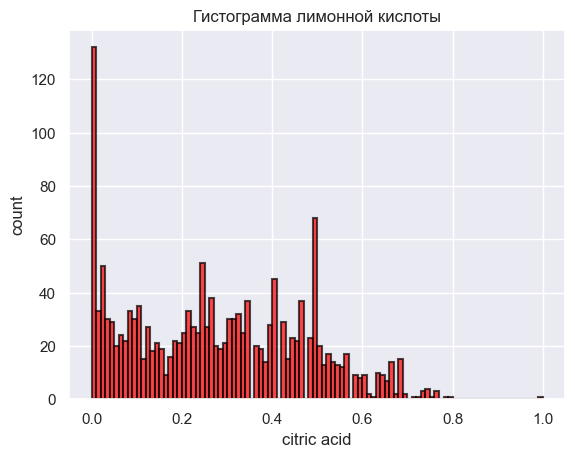

In [93]:
plt.hist(db['citric acid'], bins=100, color='red', edgecolor='black', linewidth=1.5, alpha=0.7)
plt.xlabel('citric acid')
plt.ylabel('count')
plt.title('Гистограмма лимонной кислоты')
plt.show()

Гистограмма отражает уровень лимонной кислоты в вине, с основной частью значений от 0.01 до 0.5 и максимальным значением 0.05. Значения от 0.65 до 1 убывают. Отсутствует симметрия, но можно заметить закономерность: чем ближе к максимальной части диапазона (0.05), тем реже встречаются значения лимонной кислоты в вине.

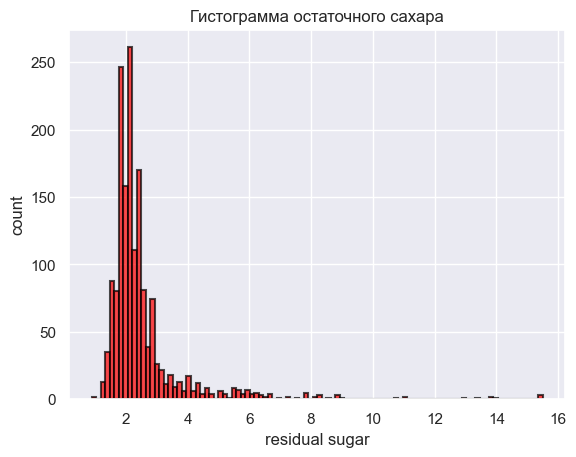

In [94]:
plt.hist(db['residual sugar'], bins=100, color='red', edgecolor='black', linewidth=1.5, alpha=0.7)
plt.xlabel('residual sugar')
plt.ylabel('count')
plt.title('Гистограмма остаточного сахара')
plt.show()

Гистограмма показывает уровень остаточного сахара в вине. Основная часть значений сосредоточена вокруг максимального значения 2-2.5, с 1/3 значения в диапазоне от 1 до 2. Значения резко снижаются к 3 и постепенно уменьшаются к 6.5, а после 7 приближаются к нулю. Нет симметрии, но есть закономерность: чем дальше от максимального значения, тем реже значения остаточного сахара встречаются в вине.

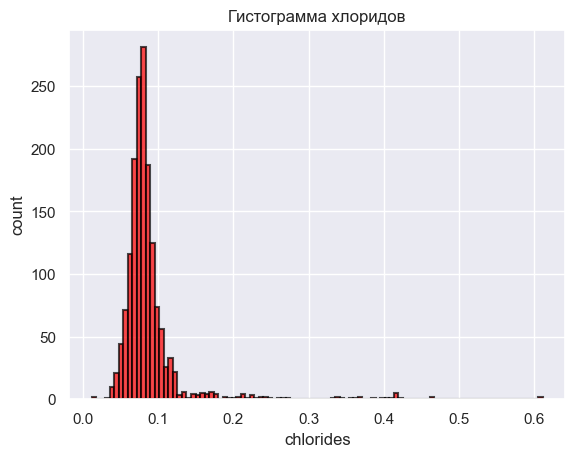

In [95]:
plt.hist(db['chlorides'], bins=100, color='red', edgecolor='black', linewidth=1.5, alpha=0.7)
plt.xlabel('chlorides')
plt.ylabel('count')
plt.title('Гистограмма хлоридов')
plt.show()

Гистограмма отображает уровень хлоридов в вине. Максимальное значение приходится на диапазон 0.05-0.1, значения от 0 до 0.05 близки к нулю, диапазон 0.1-0.15 составляет 1/3 максимального значения, а от 0.15 до 0.5 также близок к нулю.

Отсутствует симметрия. Закономерность: чем дальше от максимального значения, тем меньше встречаются значения хлоридов в вине.

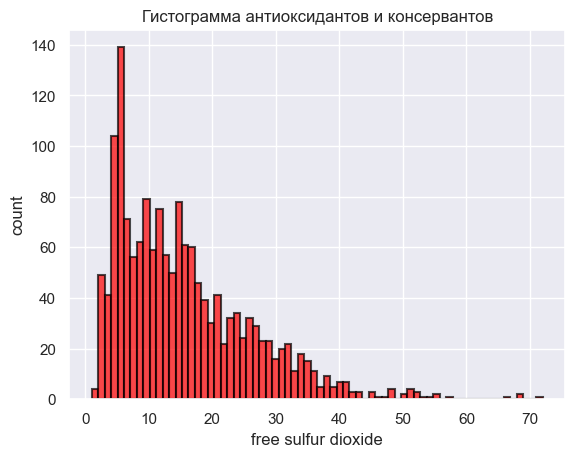

In [96]:
plt.hist(db['free sulfur dioxide'], bins=70, color='red', edgecolor='black', linewidth=1.5, alpha=0.7)
plt.xlabel('free sulfur dioxide')
plt.ylabel('count')
plt.title('Гистограмма антиоксидантов и консервантов')
plt.show()

Гистограмма показывает уровень антиоксидантов и консервантов в вине. Основная часть значений находится в диапазоне от 2 до 15, с максимальным значением на уровне 5. После значения 15 следует постепенное убывание до 40, а после 40 значения стремятся к нулю. Значения от 0 до 2 резко увеличиваются.

Отсутствует симметричность. Закономерность: чем дальше от основной части диапазона, тем меньше встречаются значения антиоксидантов и консервантов.

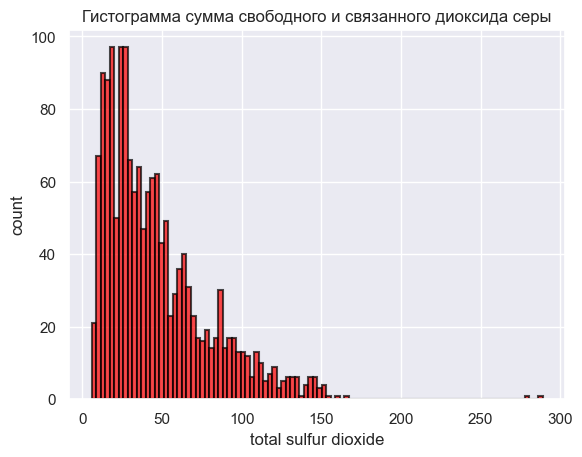

In [106]:
plt.hist(db['total sulfur dioxide'], bins=100, color='red', edgecolor='black', linewidth=1.5, alpha=0.7)
plt.xlabel('total sulfur dioxide')
plt.ylabel('count')
plt.title('Гистограмма сумма свободного и связанного диоксида серы')
plt.show()

Гистограмма отражает сумму свободных и связанных диоксидов серы в вине. Максимальное значение находится на уровне 40, причем значения от 0 до 40 близки к максимуму. После значения 40 следует постепенное снижение до 0 в диапазоне от 40 до 170, а затем значения от 170 до 300 также приближаются к нулю.

Отсутствует симметричность. Закономерность: чем дальше от максимального значения, тем меньше встречаются значения суммы диоксидов серы в вине.

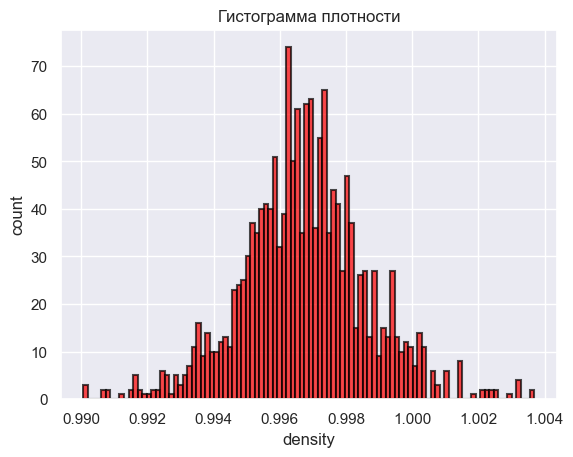

In [98]:
plt.hist(db['density'], bins=100, color='red', edgecolor='black', linewidth=1.5, alpha=0.7)
plt.xlabel('density')
plt.ylabel('count')
plt.title('Гистограмма плотности')
plt.show()

Гистограмма отображает плотность вина. Максимальные значения приходятся на диапазон от 0.996 до 0.998. Плотность повышается от 0.99 до максимума в этом диапазоне, а затем снижается от максимума до 0 в диапазоне от 0.998 до 1.004.

Имеется симметричность. Закономерность: чем дальше от максимального значения, тем реже встречаются значения плотности вина.

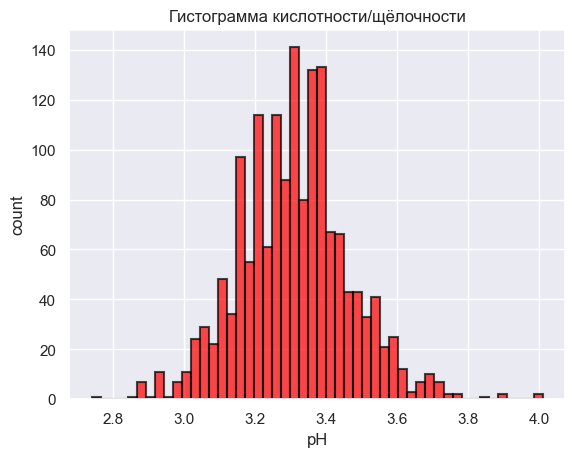

In [99]:
plt.hist(db['pH'], bins=50, color='red', edgecolor='black', linewidth=1.5, alpha=0.7)
plt.xlabel('pH')
plt.ylabel('count')
plt.title('Гистограмма кислотности/щёлочности')
plt.show()

Гистограмма отражает кислотность/щелочность вина. Максимальные значения находятся в диапазоне от 3.2 до 3.4. Показатели с 2.75 до 3.2 постепенно увеличиваются от нуля до максимума, а значения с 3.4 до 4.0 убывают с максимума до нуля.

Присутствует некоторая симметричность. Закономерность: чем дальше от максимального значения, тем реже встречаются значения кислотности/щелочности вина.

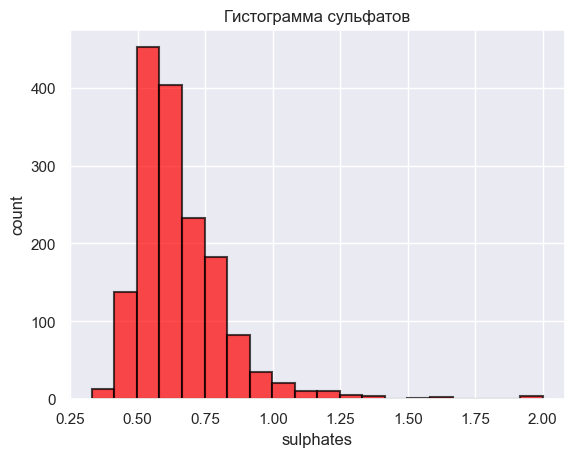

In [100]:
plt.hist(db['sulphates'], bins=20, color='red', edgecolor='black', linewidth=1.5, alpha=0.7)
plt.xlabel('sulphates')
plt.ylabel('count')
plt.title('Гистограмма сульфатов')
plt.show()

Гистограмма отображает уровень сульфатов в вине. Максимальное значение приходится на диапазон от 0.5 до 0.7. Значения от 0 до 0.5 увеличиваются до середины максимума, а от 0.7 до 1.25 убывают к минимуму и остаются на минимальном уровне до 2.

Отсутствует симметричность. Закономерность: чем дальше от максимума, тем реже встречаются значения сульфатов в вине.

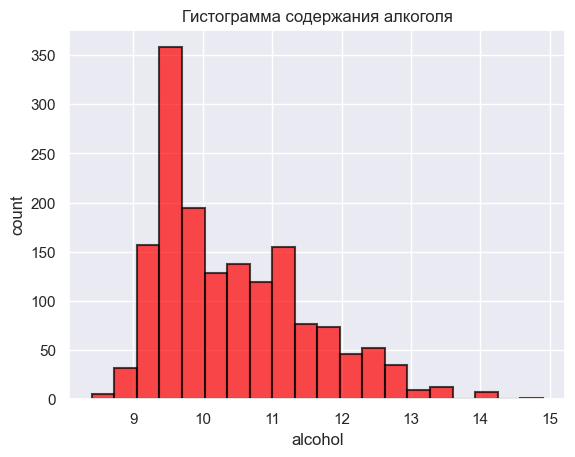

In [101]:
plt.hist(db['alcohol'], bins=20, color='red', edgecolor='black', linewidth=1.5, alpha=0.7)
plt.xlabel('alcohol')
plt.ylabel('count')
plt.title('Гистограмма содержания алкоголя')
plt.show()

Гистограмма отображает уровень содержания алкоголя в вине. Максимальное значение приходится на диапазон на 9.5. Значения от 0 до 9.5 увеличиваются до середины максимума, а от 9.5 до 13.5 убывают с середины к минимуму и остаются на минимальном уровне до 15.

Отсутствует симметричность. Закономерность: чем дальше от максимума, тем меньше уровень содержания алкоголя в вине.

## 8. Графики зависимости

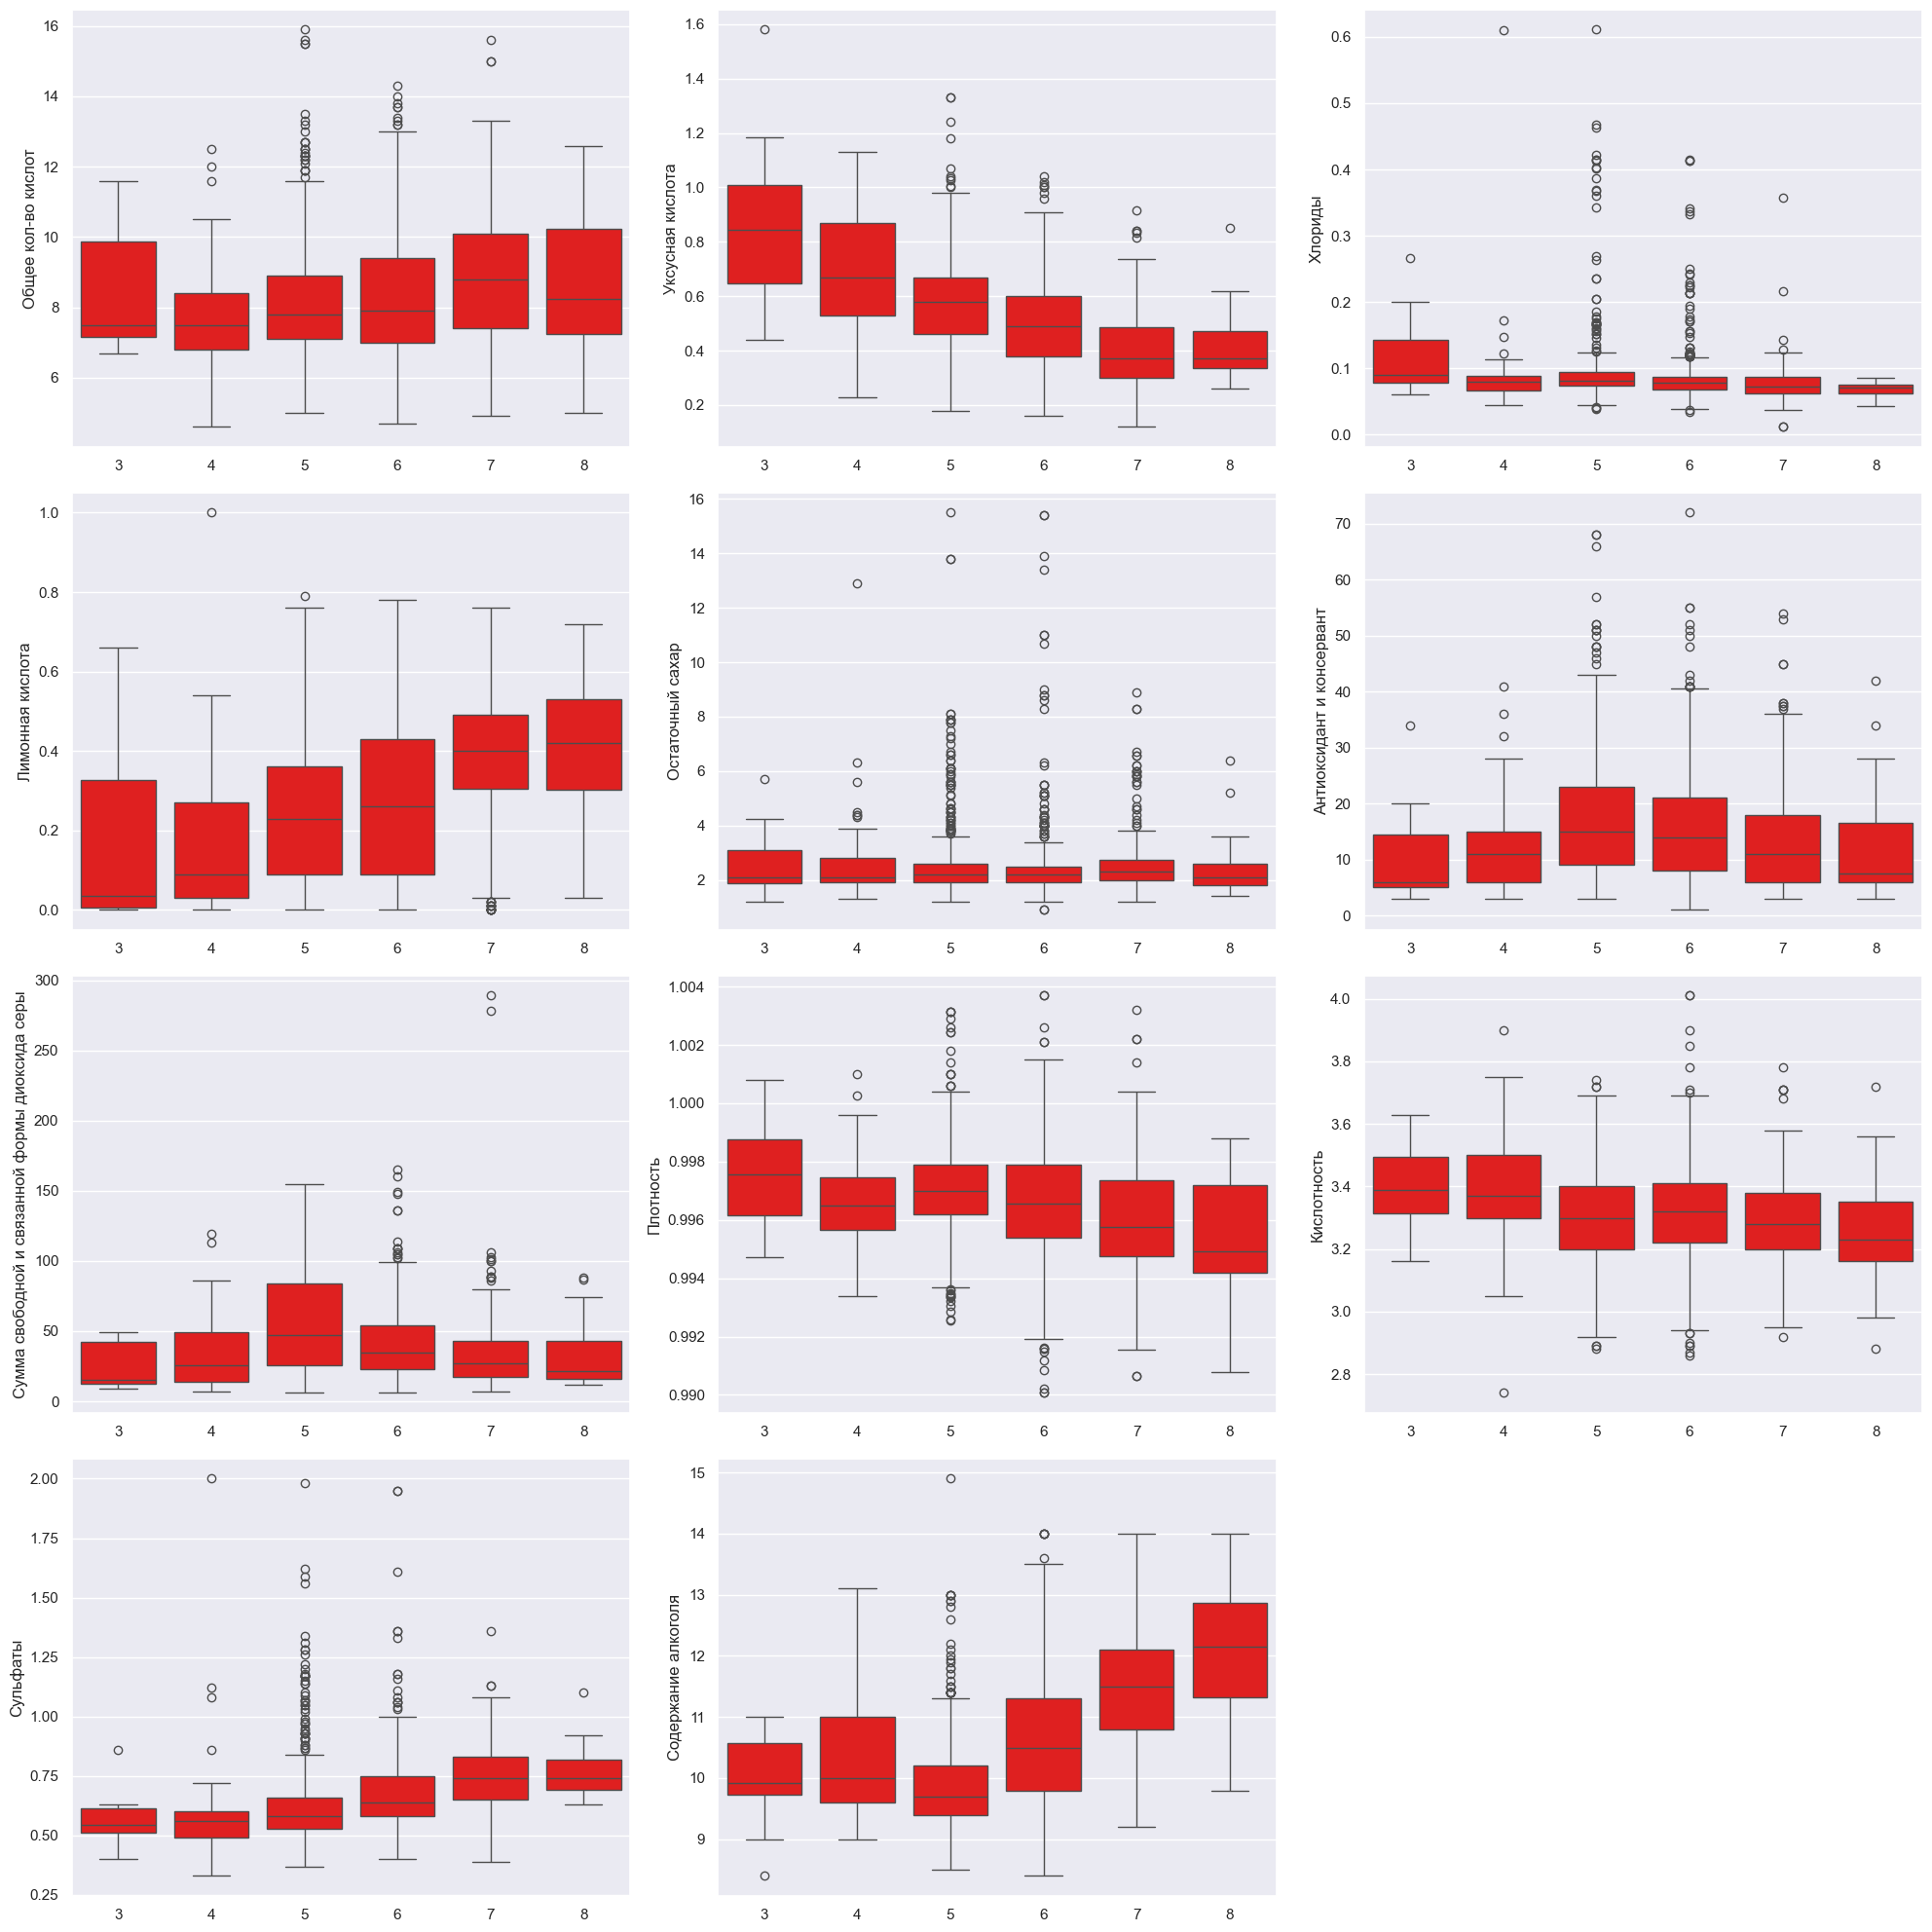

In [102]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

sns.set(style="darkgrid")

sns.boxplot(x=db['quality'], y=db['fixed acidity'], ax=axs[0, 0], color='red')
axs[0, 0].set_ylabel('Общее кол-во кислот')
axs[0, 0].set_xlabel('')

sns.boxplot(x=db['quality'], y=db['volatile acidity'], ax=axs[0, 1], color='red')
axs[0, 1].set_ylabel('Уксусная кислота')
axs[0, 1].set_xlabel('')

sns.boxplot(x=db['quality'], y=db['citric acid'], ax=axs[1, 0], color='red')
axs[1, 0].set_ylabel('Лимонная кислота')
axs[1, 0].set_xlabel('')

sns.boxplot(x=db['quality'], y=db['residual sugar'], ax=axs[1, 1], color='red')
axs[1, 1].set_ylabel('Остаточный сахар')
axs[1, 1].set_xlabel('')

sns.boxplot(x=db['quality'], y=db['chlorides'], ax=axs[0, 2], color='red')
axs[0, 2].set_ylabel('Хлориды')
axs[0, 2].set_xlabel('')

sns.boxplot(x=db['quality'], y=db['free sulfur dioxide'], ax=axs[1, 2], color='red')
axs[1, 2].set_ylabel('Антиоксидант и консервант')
axs[1, 2].set_xlabel('')

sns.boxplot(x=db['quality'], y=db['total sulfur dioxide'], ax=axs[2, 0], color='red')
axs[2, 0].set_ylabel('Сумма свободной и связанной формы диоксида серы')
axs[2, 0].set_xlabel('')

sns.boxplot(x=db['quality'], y=db['density'], ax=axs[2, 1], color='red')
axs[2, 1].set_ylabel('Плотность')
axs[2, 1].set_xlabel('')

sns.boxplot(x=db['quality'], y=db['pH'], ax=axs[2, 2], color='red')
axs[2, 2].set_ylabel('Кислотность')
axs[2, 2].set_xlabel('')

sns.boxplot(x=db['quality'], y=db['sulphates'], ax=axs[3, 0], color='red')
axs[3, 0].set_ylabel('Сульфаты')
axs[3, 0].set_xlabel('')

sns.boxplot(x=db['quality'], y=db['alcohol'], ax=axs[3, 1], color='red')
axs[3, 1].set_ylabel('Содержание алкоголя')
axs[3, 1].set_xlabel('')

fig.delaxes(axs[3, 2])

plt.tight_layout()
plt.show()

**fixed acidity** данный график, указывает, что зависимости между качеством и кол-вом общих кислот нет зависимости, но стоит подметить, что у не качественных разнообразие значительно меньше, нежели у остальных.      
**volatile acidity** в данном случае мы видим, что у качественных вин значительно меньше уксусной кислоты, нежели в остальных. Притом, чем её меньше, тем качественнее вино.        
**citric Acid** в основном, количество лимонной кислоты влияет на качество вина, а именно чем больше - тем качественнее, но стоит отметить, что разнообразие количества данной кислоты у всех вин практически идентично.       
**residual Sugar** на данном графике отсутствует закономерная зависимость, но стоит подметить, что у средних по качеству большее разнообразие кол-ва остаточного сахара, нежели у топовых и плохих.     
**chlorides** практически полностью повторяет график остаточного сахара, зависимости от качества - нет.     
**free sulfur dioxide** также не имеет определенной закономерности, как и диаграмма с хлоридами.        
**total Sulfur Dioxide** также не имеет определенной закономерности, как и диаграмма с хлоридами.       
**density** имеется некая закономерность в том, что чем лучше вино - тем меньше плотность, но также стоить подметить, что более качественное имеет большее разнообразие плотностей.     
**pH** данный график подобен графику плотности вина. Имеет подобную закономерность.     
**sulphates** также имеет закономерность - чем лучше вино, тем большее количество сульфатов. Имеются некоторые исключения.      
**alcohol** не имеет строгой закономерности, а именно: вино с оценкой 2 и 3 подобно вину с оценкой 4 и 5. Далее кол-во спирта в вине увеличивается, пропорционально его качеству.

## 9. Зависимость двух переменных от целевой переменной

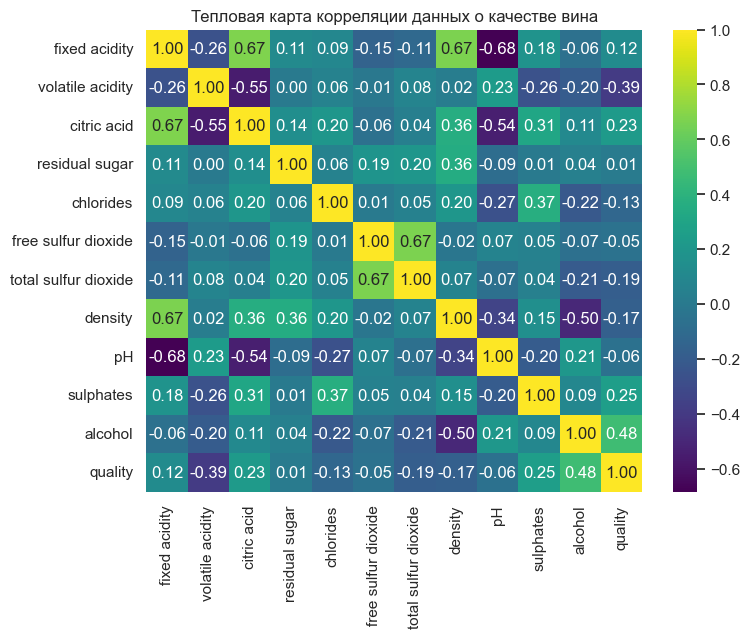

In [103]:
num_columns = db.select_dtypes(include=['int64', 'float64'])
correlation_matrix = num_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')

plt.title('Тепловая карта корреляции данных о качестве вина')
plt.show()